# Fake Hotel

## Who Will Cancel?

*Fake Hotel* is preparing for the summer vacation season; however, they are concerned that many of their customers cancel at the last minute, leaving them with empty rooms. Some guests simply do not show up, and although a reservation fee is sometimes charged, the majority of profits come when guests pay the remainder upon checking in.

Using their data, they would like you to help identify customers who are more likely to cancel so they can follow up with them. If they do need to cancel, they hope it happens as early as possible.


![](./header.png)

## Data

*Fake Hotel* has two branches: one located in the state capital, "City Hotel," and another in a coastal community, "Resort Hotel."

The data they provided is in CSV format, where each row represents a reservation with the following attributes:

```python
import pandas as pd

data = pd.read_csv('hotel_bookings_training.csv')
data.head()
```


## ¿Qué métricas podemos medir? 

¿Accuracy? pero, y ¿si nos interesa otra cosa?

Nos interesa hallar a TODAS las personas que potencialmente pueden cancelar, y la verdad es que a nuestros clientes no les molesta mucho si les llamamos para confirmar su reserva.

## Ejercicio

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport


import warnings
warnings.filterwarnings('ignore')

/mnt/d/Data_Projects/CodigoFacilito/.codigo/bin/pip: 2: exec: /mnt/d/Data Science Projects/CodigoFacilito/.codigo/bin/python: not found


ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:
hotel_2015_2016_20217 = pd.read_csv("data/hotel_bookings_training.csv")

hotel_2018 = pd.read_csv("data/hotel_booking_test_validate.xlsx",sheet_name='2018')
hotel_2019 = pd.read_csv("data/hotel_booking_test_validate.xlsx",sheet_name='2019')
new_customers = pd.read_csv("data/hotel_booking_test_validate.xlsx",sheet_name='2020')

dfh=pd.concat([hotel_2015_2016_20217,hotel_2018,hotel_2019])

In [3]:
dfh.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,City Hotel,0,21,2015,September,36,1,0,4,2,...,Transient,105.0,0,0,Check-Out,2015-09-05,Timothy George,George_Timothy@mail.com,638-082-2623,************3627
1,City Hotel,0,20,2016,September,38,12,1,0,1,...,Transient,89.0,0,2,Check-Out,2016-09-13,Angela Carpenter,Angela.C@verizon.com,874-747-0095,************7934
2,City Hotel,0,2,2016,March,13,24,0,2,2,...,Transient,134.0,0,1,Check-Out,2016-03-26,Richard Scott,RScott80@verizon.com,311-116-4410,************1822
3,Resort Hotel,1,6,2016,April,17,21,0,1,2,...,Transient,73.0,0,0,Canceled,2016-04-18,Daniel Cooper,DanielCooper@yandex.com,375-297-1783,************7716
4,Resort Hotel,0,40,2015,August,34,20,2,3,2,...,Transient,176.8,1,1,Check-Out,2015-08-25,David Young,David_Young@gmail.com,910-698-3037,************4952


In [4]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119190 entries, 0 to 119189
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119190 non-null  object 
 1   is_canceled                     119190 non-null  int64  
 2   lead_time                       119190 non-null  int64  
 3   arrival_date_year               119190 non-null  int64  
 4   arrival_date_month              119190 non-null  object 
 5   arrival_date_week_number        119190 non-null  int64  
 6   arrival_date_day_of_month       119190 non-null  int64  
 7   stays_in_weekend_nights         119190 non-null  int64  
 8   stays_in_week_nights            119190 non-null  int64  
 9   adults                          119190 non-null  int64  
 10  children                        119186 non-null  float64
 11  babies                          119190 non-null  int64  
 12  meal            

## Eliminación de datos personales

In [5]:
# Remove personal information of customers
dfh = dfh.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1)

In [6]:
dfh_obj=dfh.select_dtypes('object')
for column in dfh_obj.columns:
    print(dfh_obj[column].value_counts())
    print('***************************')

hotel
City Hotel      79200
Resort Hotel    39990
Name: count, dtype: int64
***************************
arrival_date_month
August       13856
July         12642
May          11764
October      11144
April        11070
June         10919
September    10495
March         9775
February      8056
November      6775
December      6770
January       5924
Name: count, dtype: int64
***************************
meal
BB           92160
HB           14434
SC           10631
Undefined     1169
FB             796
Name: count, dtype: int64
***************************
country
PRT    48511
GBR    12113
FRA    10400
ESP     8549
DEU     7273
       ...  
SLE        1
FJI        1
BDI        1
AIA        1
MRT        1
Name: count, Length: 177, dtype: int64
***************************
market_segment
Online TA        56392
Offline TA/TO    24170
Groups           19777
Direct           12581
Corporate         5292
Complementary      741
Aviation           235
Undefined            2
Name: count, dtype: int6

In [7]:
dfh['agent'].value_counts().head(10)

agent
9.0      31915
240.0    13901
1.0       7182
14.0      3635
7.0       3533
6.0       3283
250.0     2863
241.0     1718
28.0      1663
8.0       1509
Name: count, dtype: int64

In [8]:
dfh.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              487
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16315
company         

In [9]:
for column in dfh_obj.columns:
    print(pd.crosstab(dfh[column], dfh['is_canceled']))
    print('***************************')

is_canceled       0      1
hotel                     
City Hotel    46154  33046
Resort Hotel  28885  11105
***************************
is_canceled            0     1
arrival_date_month            
April               6557  4513
August              8623  5233
December            4404  2366
February            5361  2695
January             4120  1804
July                7904  4738
June                6394  4525
March               6629  3146
May                 7097  4667
November            4657  2118
October             6906  4238
September           6387  4108
***************************
is_canceled      0      1
meal                     
BB           57705  34455
FB             319    477
HB            9462   4972
SC            6670   3961
Undefined      883    286
***************************
is_canceled    0    1
country              
ABW            2    0
AGO          157  204
AIA            1    0
ALB           10    2
AND            2    5
...          ...  ...
VGB            0

In [10]:
pd.crosstab(dfh['hotel'], dfh['is_canceled'])

is_canceled,0,1
hotel,,
City Hotel,46154,33046
Resort Hotel,28885,11105


In [14]:
profile = ProfileReport(dfh, title="Pandas Profiling Report")

In [15]:
profile.to_file("bookings_profile.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]


In [11]:
# Mucha correlación entre is_cancelled y reservation_status. Por tanto, es importante eliminarla para evitar multicolinealidad
dfh.drop(columns={'reservation_status', 'reservation_status_date'}, inplace=True)

In [12]:
dfh.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,0,21,2015,September,36,1,0,4,2,...,A,2,No Deposit,9.0,NaN,0,Transient,105.0,0,0
1,City Hotel,0,20,2016,September,38,12,1,0,1,...,A,0,No Deposit,9.0,NaN,0,Transient,89.0,0,2
2,City Hotel,0,2,2016,March,13,24,0,2,2,...,A,0,No Deposit,9.0,NaN,0,Transient,134.0,0,1
3,Resort Hotel,1,6,2016,April,17,21,0,1,2,...,D,0,No Deposit,NaN,NaN,0,Transient,73.0,0,0
4,Resort Hotel,0,40,2015,August,34,20,2,3,2,...,D,0,No Deposit,250.0,NaN,0,Transient,176.8,1,1


### Split the dataset

In [13]:
is_canceled = dfh['is_canceled'].copy()
hotel_data = dfh.drop(['is_canceled'], axis=1)

In [ ]:
# Calculate test and validation set size:
# original_count = len(dfh)
# training_size = 0.60 # 60% of records
# test_size = (1 - training_size) / 2


# training_count = int(original_count * training_size)
# test_count = int(original_count * test_size)
# validation_count = original_count - training_count - test_count

# print(f'training_count: {training_count}\ntest_count: {test_count}\nvalidation_count: {validation_count}\noriginal_count: {original_count}\n')

training_count: 71514
test_count: 23838
validation_count: 23838
original_count: 119190



In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(hotel_data, is_canceled, train_size=0.80)
#test_x, validate_x, test_y, validate_y = train_test_split(rest_x, rest_y, train_size=test_count)

print(len(train_x), len(test_x))

71514 23838 23838


## Modificaciones en columnas para la aplicación del modelo de ML

### One Hot Encoding

In [16]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

In [17]:
one_hot_encoder.fit(train_x[['hotel']])
one_hot_encoder.transform(train_x[['hotel']])

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Binarization

### Instead of counting the number of requests, simply understand whether the customer made requests or not.

```python
data['has_special_requests'] = data['total_of_special_requests'] > 0
```

In [22]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [25]:
_ = train_x.copy()
binarizer.fit(_[['total_of_special_requests']])
_['has_made_special_requests'] = binarizer.transform(train_x[['total_of_special_requests']])

_[['total_of_special_requests', 'has_made_special_requests']].sample(15)

,total_of_special_requests,has_made_special_requests
6419,0,0
2550,2,1
35868,0,0
35468,3,1
104592,0,0
110049,1,1
10054,0,0
20174,1,1
24371,0,0
49295,1,1


In [24]:
print(train_x['total_of_special_requests'].unique())
print(_['has_made_special_requests'].unique())

[1 0 2 3 4 5]
[1 0]


## Variables to Scale

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
data[['lead_time', 'adr']] = scaler.fit_transform(data[['lead_time', 'adr']])
```

- Transform high values into values between -1 and 1.
- Why scale? The idea is to bring all columns into the same range so that no variable has a greater impact than another.

In [26]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [27]:
_ = train_x.copy()
scaler.fit(_[['adr']])
_['adr_scaled'] = scaler.transform(train_x[['adr']])

_[['adr', 'adr_scaled']].sample(10)

,adr,adr_scaled
106887,128.70,0.603494
73690,87.00,-0.132345
91974,68.81,-0.453326
60179,107.00,0.220575
115033,62.00,-0.573496
101224,112.20,0.312335
3285,129.00,0.608788
24380,68.00,-0.467620
88039,89.10,-0.095289
32932,133.67,0.691195


In [33]:
_['adr'].describe()

count    71514.000000
mean       101.789823
std         48.106417
min         -6.380000
25%         69.330000
50%         94.500000
75%        126.000000
max        508.000000
Name: adr, dtype: float64

In [35]:
_['adr_scaled'].describe()

count    71514.000000
mean         0.128636
std          0.848887
min         -1.780131
25%         -0.444150
50%          0.000000
75%          0.555850
max          7.296630
Name: adr_scaled, dtype: float64

<Axes: >

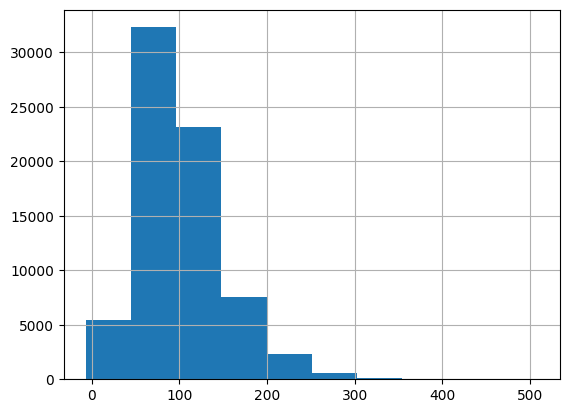

In [34]:
_['adr'].hist()

<Axes: >

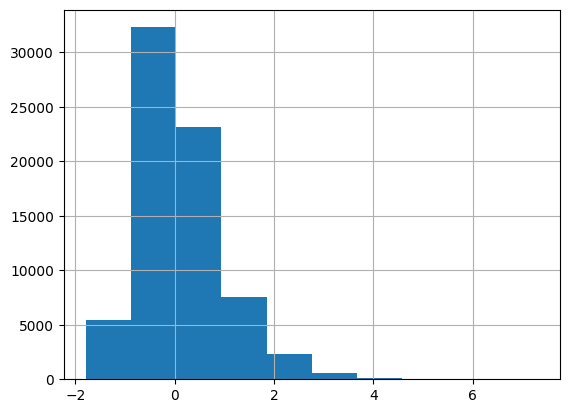

In [36]:
_['adr_scaled'].hist()

### Armado del Pipeline

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

In [37]:
one_hot_encoding = ColumnTransformer([
    (
        'one_hot_encode',
        OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
        [
            "hotel",
            "meal", 
            "distribution_channel", 
            "reserved_room_type", 
            "assigned_room_type", 
            "customer_type"
        ]
    )
])

In [38]:
binarizer = ColumnTransformer([
    (
        'binarizer',
        Binarizer(),
        [
            "total_of_special_requests", 
            "required_car_parking_spaces", 
            "booking_changes", 
            "previous_bookings_not_canceled", 
            "previous_cancellations",
        ]
    )
])
    
one_hot_binarized = Pipeline([
    ("binarizer", binarizer),
    ("one_hot_encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
])

In [39]:
scaler = ColumnTransformer([
    ("scaler", 
     RobustScaler(), 
     [
         "adr"
    ])
])

In [40]:
passthrough = ColumnTransformer([
    (
        "passthrough",
        "passthrough",
        [
            "stays_in_week_nights",
            "stays_in_weekend_nights",
        ]
    )
])

In [41]:
feature_engineering_pipeline = pipe = Pipeline(
    [
        (
            "features",
            FeatureUnion(
                [
                    ("categorical", one_hot_encoding),
                    ("categorical_binarized", one_hot_binarized),
                    ("scaled", scaler),
                    ("pass", passthrough),
                ]
            ),
        )
    ]
)

In [42]:
transformed = feature_engineering_pipeline.fit_transform(train_x)   
transformed.shape

(71514, 51)

In [43]:
feature_engineering_pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('categorical',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                sparse_output=False),
                                                                                  ['hotel',
                                                                                   'meal',
                                                                                   'distribution_channel',
                                                                                   'reserved_room_type',
                                                                                   'assigned_room_type',
                                                                                   'customer_type'])])),
                                                ('categorical_binarized',
                                                 Pipeline(steps=[('binarizer',
                                                                  ColumnTrans...
                                                                                                    'previous_bookings_not_canceled',
                                                                                                    'previous_cancellations'])])),
                                                                 ('one_hot_encoder',
                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                sparse_output=False))])),
                                                ('scaled',
                                                 ColumnTransformer(transformers=[('scaler',
                                                                                  RobustScaler(),
                                                                                  ['adr'])])),
                                                ('pass',
                                                 ColumnTransformer(transformers=[('passthrough',
                                                                                  'passthrough',
                                                                                  ['stays_in_week_nights',
                                                                                   'stays_in_weekend_nights'])]))]))])

## Model Training

In [ ]:
# Get a fresh copy of the pipeline
from sklearn.base import clone

feature_transformer = clone(feature_engineering_pipeline)

features_train_x = feature_transformer.fit_transform(train_x)
features_test_x = feature_transformer.transform(test_x)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(features_train_x, train_y)

RandomForestClassifier()

## Model Validation

In [ ]:
from sklearn.metrics import accuracy_score, recall_score

pred_y = model.predict(features_test_x)

print(accuracy_score(test_y, pred_y))
print(recall_score(test_y, pred_y))

0.8066112928936991
0.7151221709266975


## Pipeline Final

In [47]:
final_inference_pipeline = Pipeline([
    ("feature_engineering", clone(feature_engineering_pipeline)),
    ("model", RandomForestClassifier(n_estimators=100))
])

In [ ]:
final_training_dataset = pd.concat([train_x, test_x])
final_training_response = pd.concat([train_y, test_y])
final_inference_pipeline.fit(final_training_dataset, final_training_response)

Pipeline(steps=[('feature_engineering',
                 Pipeline(steps=[('features',
                                  FeatureUnion(transformer_list=[('categorical',
                                                                  ColumnTransformer(transformers=[('one_hot_encode',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False),
                                                                                                   ['hotel',
                                                                                                    'meal',
                                                                                                    'distribution_channel',
                                                                                                    'reserved_room_type',
                                                                                                    'assigned_room_type',
                                                                                                    'customer_type'])])),
                                                                 ('categorical_binarized',
                                                                  P...
                                                                                                                     'previous_cancellations'])])),
                                                                                  ('one_hot_encoder',
                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                 sparse_output=False))])),
                                                                 ('scaled',
                                                                  ColumnTransformer(transformers=[('scaler',
                                                                                                   RobustScaler(),
                                                                                                   ['adr'])])),
                                                                 ('pass',
                                                                  ColumnTransformer(transformers=[('passthrough',
                                                                                                   'passthrough',
                                                                                                   ['stays_in_week_nights',
                                                                                                    'stays_in_weekend_nights'])]))]))])),
                ('model', RandomForestClassifier())])

## Testing Model

In [52]:
test_pred_y = final_inference_pipeline.predict(test_x)

print(accuracy_score(test_pred_y, test_y))
print(recall_score(test_pred_y, test_y))

0.8152529574628744
0.7582273969347748


In [ ]:
hotel_2018 = pd.read_csv("data/hotel_booking_test_validate.xlsx",sheet_name='2018')
hotel_2019 = pd.read_csv("data/hotel_booking_test_validate.xlsx",sheet_name='2019')
hotel_2020 = pd.read_csv("data/hotel_booking_test_validate.xlsx",sheet_name='2020')



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,name,email,phone-number,credit_card
0,City Hotel,0,0,2016,March,13,22,0,1,2,...,NaN,0,Transient,99.0,0,1,Elizabeth Morton,ElizabethMorton@xfinity.com,218-662-6872,************5891
1,City Hotel,0,21,2016,March,13,23,0,3,2,...,NaN,0,Transient-Party,62.0,0,1,Virginia Ward,Virginia_Ward51@gmail.com,845-529-3632,************1071
2,City Hotel,0,418,2016,September,40,26,1,2,2,...,NaN,223,Transient-Party,107.0,0,0,Joseph Taylor,Joseph_T@protonmail.com,451-454-5767,************5326
3,City Hotel,0,58,2016,March,12,17,0,3,2,...,NaN,0,Transient,63.0,0,0,Sara Allen,Sara_Allen18@yandex.com,402-581-2687,************8597
4,Resort Hotel,0,130,2017,July,28,9,2,0,1,...,NaN,0,Transient-Party,178.0,0,1,John Black,Black.John47@yandex.com,541-901-5663,************9017


In [55]:
new_customers['will_cancel'] = final_inference_pipeline.predict(new_customers)
new_customers[['proba_check_in', 'proba_cancel']] = final_inference_pipeline.predict_proba(new_customers)

In [61]:
cancel = new_customers[['name', 'phone-number', 'will_cancel', 'proba_cancel']].sort_values(by='proba_cancel', ascending=False)
cancel = cancel[cancel['will_cancel'] == 1]

In [67]:
cancel.tail()

,name,phone-number,will_cancel,proba_cancel
53,Traci Smith,610-842-6627,1,0.668296
57,Nicholas Doyle,344-642-0763,1,0.630000
60,Brandon Delgado,560-927-0003,1,0.620139
25,David Small,429-167-6765,1,0.616000
11,Ashley Smith,657-721-1933,1,0.603944


In [65]:
cancel[cancel['proba_cancel'] > 0.89].shape[0]

17

In [59]:
new_customers.shape

(100, 37)